In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
import sklearn

**Explore data distribution and remove outliers**

In [4]:
# -- Read matrix containing embeddings and labels
path_df = '/Users/leandro/Desktop/ai_data/ORF2_features/X.csv' 
df = pd.read_csv(path_df)

In [6]:
# Remove undesired column and filter mammalian entries
df = df.drop(columns=['Unnamed: 0'])
df_mammals = df[df['Taxonomy'] == 'Mammalia']

**Check how CN and prot_len distribution changes when removing non-mammals**

Text(0.5, 1.0, 'Complete dataset')

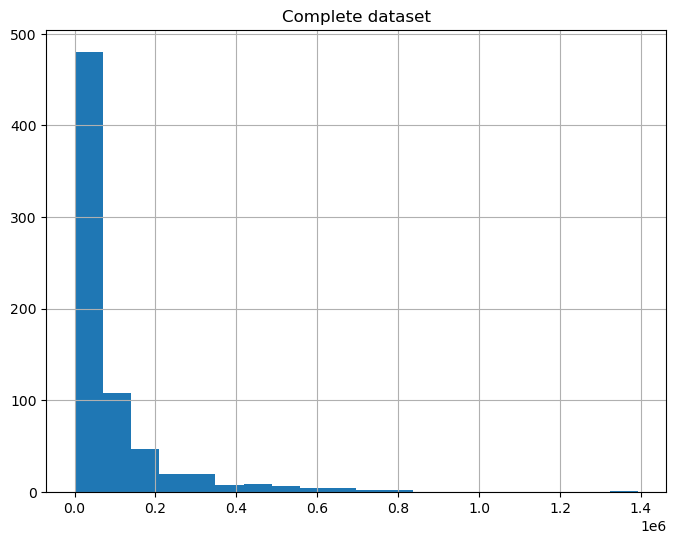

In [8]:
df['Non_redundant'].hist(bins = 20, figsize=(8,6))
#plt.xlabel('Non Redundant')
#plt.ylabel('copy number')
plt.title('Complete dataset')

In [ ]:
df_mammals['Non_redundant'].hist(bins = 20, figsize=(8,6))
plt.title('Mammalian sequences')

In [ ]:
df['prot_len'].hist(bins = 20, figsize=(8,6))
plt.title('Complete dataset')

In [ ]:
df_mammals['prot_len'].hist(bins = 20, figsize=(8,6))
plt.title('Mammalian sequences')

**Explore correlation among all dimensions**

In [9]:
# -- Compute correlation matrix among dimensiones (contains Pearson's r)
corr_matrix = df_mammals.corr() # generate correlation matrix
matrix_subset = corr_matrix.iloc[:10,:10]  # REMEMBER USING ILOC !!

In [19]:
# -- Plot correlation matrix as heatmap
matrix_subset.style.background_gradient(cmap='coolwarm')

Text(0.5, 1.0, 'Correlation Matrix')

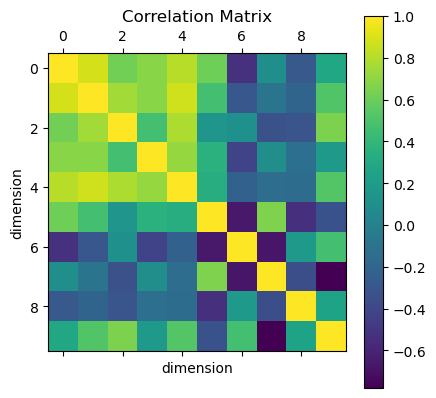

In [34]:
# -- Another way to plot correlation matrix 
plt.matshow(matrix_subset)
cb = plt.colorbar()
plt.xlabel('dimension')
plt.ylabel('dimension')
plt.title('Correlation Matrix', fontsize=12)

In [ ]:
# -- Exploring another correlation coefficient matrix with Numpy
numbers = split_df.iloc[:,1:]  # select only numerical values 
cm = np.corrcoef(numbers.values.T)  # Compute correlation coefficient
sns.set(font_scale=1) # letter size
hm = sns.heatmap(cm, cmap='coolwarm', cbar=True, annot=True, square=True, fmt = '.2f', annot_kws={'size': 10},) # yticklabels=cols, xticklabels=cols

# Explore correlation between each vector dimension and CN values

In [48]:
# -- Compute Pearson's correlation
embeddings_cn = df.iloc[:,1:-2]  # leave only embs dimensions and copy number values
corr_matrix = embeddings_cn.corr() # compute correlation matrix (Pearson's)
correlations_cn = corr_matrix['Non_redundant'].sort_values(ascending=False) # sort columns (dimensions) that correlates more to CN in descending order
#correlations_cn

Non_redundant    1.000000
889              0.364534
878              0.360011
185              0.353876
80               0.351794
                   ...   
893             -0.360085
234             -0.362511
611             -0.383506
979             -0.397090
767             -0.402976
Name: Non_redundant, Length: 1025, dtype: float64

Text(0.5, 1.0, 'All dimensions')

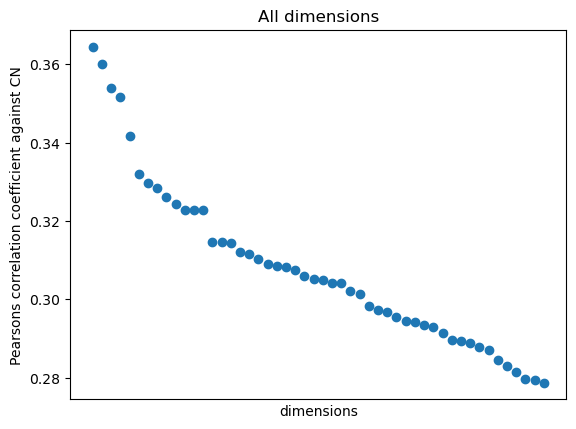

In [87]:
# -- [:1] to select first dimension (cn against itself) and take 50 highest values
plt.scatter(y=correlations_cn[1:].nlargest(50).values, x=correlations_cn[1:].nlargest(50).index) # Plot correlation variation (sorted)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Pearsons correlation coefficient against CN')
plt.xlabel('dimensions')
plt.title('All dimensions')

In [88]:
# Select 14 highest dimensions 
a = correlations_cn.nlargest(13).reset_index() # reset index to select dimensions
elbow_dimensions=[]
for i in a['index']:
    elbow_dimensions.append(i)
elbow_dimensions

# -- Filtering df to select only dimensions above elbow (13)
elbow_df = df.loc[:, df.columns.isin(elbow_dimensions)]
elbow_df

In [89]:
elbow_df

,5,56,80,148,185,196,206,670,818,847,878,889,Non_redundant
0,0.002213,-0.079880,-0.029521,0.311775,-0.017735,-0.090784,0.072706,-0.044583,-0.162113,0.035859,-0.049153,0.021194,156
1,0.039000,-0.017950,-0.006292,0.139450,0.002989,-0.018245,0.102290,0.006762,-0.025072,0.028671,-0.008370,-0.003229,115927
2,0.002427,-0.036878,-0.033335,0.081272,-0.020655,-0.023517,-0.001974,-0.003530,-0.057756,0.006613,-0.073308,-0.025512,121
3,0.044911,-0.029806,-0.007811,0.131390,-0.002516,-0.025290,0.098168,0.003229,-0.021878,0.023714,-0.006497,-0.010646,13369
4,-0.005931,-0.047064,-0.037697,0.079872,-0.018852,-0.022842,-0.000690,0.001628,-0.070472,0.018930,-0.065100,-0.020278,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.047316,-0.021716,-0.012637,0.069861,-0.001128,-0.012380,0.107927,0.002488,-0.034750,0.017569,-0.002636,-0.001002,18884
708,0.035792,-0.025814,-0.042749,0.039588,0.004024,-0.016727,0.059584,-0.005851,-0.011850,-0.009509,-0.040336,-0.051035,840
709,0.030819,-0.024099,-0.039852,0.057121,0.002067,-0.022764,0.044997,-0.004223,-0.005633,-0.009419,-0.042117,-0.046086,5781
710,0.016066,-0.011711,-0.010060,0.005942,-0.005190,-0.005578,0.051449,-0.014231,0.024196,0.018575,-0.037887,-0.034321,387


# Selecting important features using random forest

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Cookbook approach**

In [ ]:
features = X_mammals_numbers.iloc[:,0:-1]
target = X_mammals_numbers.iloc[:,-1]

In [96]:
embeddings = df.iloc[:,1:-3]
cn = df.iloc[:,-3]

0         156
1      115927
2         121
3       13369
4          69
        ...  
707     18884
708       840
709      5781
710       387
711     90072
Name: Non_redundant, Length: 712, dtype: int64

In [ ]:
# Create random forest classifier
forest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Create object that selects features with importance greater than or equal to a thresold
selector = SelectFromModel(forest, threshold=0.2)

In [ ]:
# New feature matrix using selector
features_important = selector.fit_transform(features, target)

In [ ]:
# Train random forest using most important features
model = forest.fit(features_important,target)

**Book approach**

In [77]:
# -- Define X and y from whole dataset and split
X = df.iloc[:,1:-3]
y = df['Non_redundant'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)  

In [79]:
# Define feature labels (vector dimensions in this case)
feat_labels = X.columns

In [18]:
# Create random forest classifier
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [80]:
importances = forest.feature_importances_  #return importance for every dimension
indices = np.argsort(importances[::-1])   # np.argsort returns the indices that would sort an array. 

In [81]:
np.argsort(importances)

array([ 663,  945,  685, ...,  679,  524, 1015])

In [82]:
np.argsort(importances[::-1])

array([360,  78, 338, ..., 344, 499,   8])

In [48]:
test_array = [0,1,2,3,4]
test_array[::-1]

[4, 3, 2, 1, 0]

In [65]:
np.argsort(test_array)

array([0, 1, 2, 3, 4])

In [66]:
np.argsort(test_array[::-1])

array([4, 3, 2, 1, 0])

In [ ]:
# Show features importances 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

In [ ]:
# Plot features importances 
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1], feat_labels, rotation=90))
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout

# Train different models using highest-scored dimensions

In [ ]:
def plot_residuals(y_train_pred, y_train, y_test_pred, y_test):
    """Define function to plot residuals"""
    plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', 
                edgecolor='white', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', 
                edgecolor='white', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=max(y_train_pred), color='black', lw=2) 
    plt.xlim([0, max(y_train_pred)])

**Simple linear regression**

In [ ]:
# -- Define X and y from X_elbow df, and split
X = X_elbow.iloc[:,1:-1].values
y = X_elbow['Non_redundant'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)  

In [ ]:
slr = LinearRegression()  # Define simple linear regression (LR)

In [ ]:
slr.fit(X_train, y_train) # fit model to training data 
y_train_pred = slr.predict(X_train)  # Relate y to X in training data
y_test_pred = slr.predict(X_test) # Predict y_test from X_test

In [ ]:
# -- Evaluate model performance using MSE and R^2 (a standardized version of MSE with better interpretability)
print('MSE -- train: %.3f, test: % .3f' %
      (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)),
      '\nR^2 -- train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

In [ ]:
plot_residuals(y_train_pred, y_train, y_test_pred, y_test)

**LASSO regularization**

In [ ]:
# -- Define X and y from X_elbow df, and split
X = X_elbow.iloc[:,1:-1].values
y = X_elbow['Non_redundant'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)  

In [ ]:
lasso = linear_model.Lasso(alpha=0.1)

In [ ]:
lasso.fit(X, y)

In [ ]:
lasso.score(X,y)

**Random Forest regression**

In [ ]:
forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1, max_depth=15)

In [ ]:
forest.fit(X_train, y_train)


In [ ]:
y_train_pred = forest.predict(X_train)

In [ ]:
y_test_pred = forest.predict(X_test)

In [ ]:
# -- Evaluate model performance using MSE and R^2 (a standardized version of MSE with better interpretability)
print('MSE -- train: %.3f, test: % .3f' %
      (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)),
      '\nR^2 -- train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

In [ ]:
plot_residuals(y_train_pred, y_train, y_test_pred, y_test)

**Robust regression model using RANSAC**

In [ ]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, 
                         loss='squared_error', residual_threshold=5.0, random_state=0)

In [ ]:
y = y.reshape(-1,1)

In [ ]:
X.shape

In [ ]:
ransac.fit(X,y)

In [ ]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0,max(y),1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Copy number(M)')
plt.ylabel('dimension')
plt.legend(loc='upper left')

In [ ]:
X.shape

# Training simple linear regression with whole vector to compare

In [ ]:
# -- Define X and y from X_mammals df, and split
X = X_mammals.iloc[:,1:-3]
y = X_mammals['Non_redundant'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)  

In [ ]:
slr.fit(X_train, y_train) # fit model to training data 
y_train_pred = slr.predict(X_train)  # Relate y to X in training data
y_test_pred = slr.predict(X_test) # Predict y_test from X_test

In [ ]:
# -- Evaluate model performance using MSE and R^2 (a standardized version of MSE with better interpretability)
print('MSE -- train: %.3f, test: % .3f' %
      (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)),
      '\nR^2 -- train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

In [ ]:
plot_residuals(y_train_pred, y_train, y_test_pred, y_test)